# AQI Prediction Model Using Python

- PM2.5 PM10
- NO, NO2
- NH3 - Ammonia
- CO
- So2
- O3
- Berzene, Toluene, Xylene

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/air quality data.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Shape - rows and cols!
df.shape

(29531, 16)

In [ ]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# to know the duplicate values
df.duplicated().sum()

0

In [ ]:
# To check missing values
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
# Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.shape

(24850, 16)

In [ ]:
# Summary of Statistics in the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
# Precentage of the null vlaues in descending order
(df.isnull().mean()*100).sort_values(ascending=False)



,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


In [ ]:
# Precentage of the null vlaues in descending
null_values_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


#### Key Considerations:
- Xylene has the highest percentage of missing values - 61.86%
- PM10 and NH3 28 - 26%

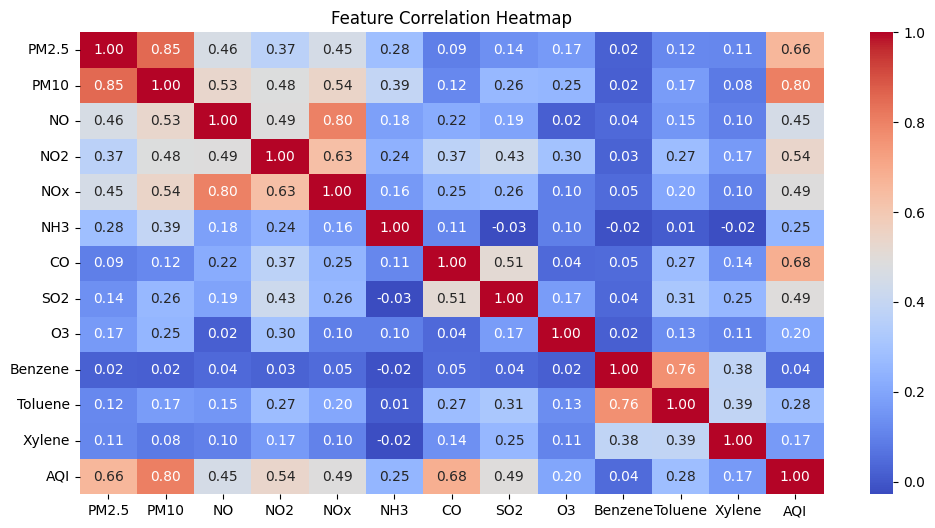

In [ ]:
# Checking Feature Correlation:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



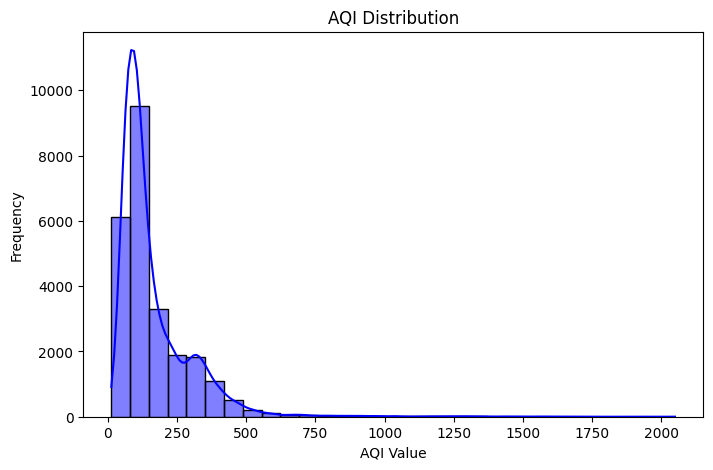

In [ ]:
# Distribution of AQI Values
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title("AQI Distribution")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Handling Categorical Data (if present):
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['City', 'Date', 'AQI_Bucket'], dtype='object')


In [ ]:
# Filling Missing Values Instead of Dropping Rows:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)



In [ ]:
#Train-Test Split and Feature Scaling:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop non-numeric columns or encode them
X = df.drop(columns=['AQI'])  # Ensure AQI is the target
y = df['AQI']

# Convert categorical columns using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert categories to numbers

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)